<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Crazy Crossfit in 2015</strong></h1>

## Intro

We, as a group, are interested to see patterns, trends, and insights from Crossfit competition statistics in 2015.

The data has been preprocessed to achieve the highest results and then applied to different analyses and hypothesis tests to identify potential trends and correlations. The dataset we decided to analyse consists of 17 numerical and 12 categorical values with dimensions of 991 x 29.


### 1. Preprocessing
+ Import python libraries and dataset
+ Merge 2 data frames (athletes & leaderboard_15)
+ Put change labels on the data.
+ Check and drop duplicated rows
+ Strip extra white-space and lowercase string content values
+ Make athlete_id unique
+ Drop meaningless columns or columns contains only a value: `retrieved_datetime_x`, `retrieved_datetime_y`, `year`, `stage`, `scaled`, `howlong`


### 2. Exploratory data analysis (EDA)
created correlation maps to see the relationship between variables and Word Cloud to visualise text contents

### 3. Basic Statistics
+ Descriptive Statistics
+ Probability Distributions
+ Normality Test
+ Confidence Intervals
+ Normality Test

### 4. Normality test

### 5. Homogeneity of variance test

### 6. Inferential Statistics
+ t test 
+ z test
+ The Mann-Whitney U test for comparing independent data samples
+ The Wilcoxon signed-rank test for comparing paired data samples
+ ANOVA
+ The Kruskal-Wallis H 
+ Independence

![tree map for summary](../media/images/hypothesis-testing.png)

### 7. Regression Analysis (Refer to the `regression.ipynb` notebook)
+ Simple linear regression
+ Multiple linear regression
+ Quadratic linear regression


<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>2. EDA</strong></h1>

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install wordcloud


# work with df in tabular representation
from datetime import time
import pandas as pd
# round the df in the correlation matrix
import numpy as np
import os
from scipy.stats import t
from scipy import stats
from statistics import *
from scipy.stats import shapiro
from numpy import mean
from numpy import std

# Modules for df visualization
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

from wordcloud import WordCloud

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# import libraries
!pip install researchpy
import os
import numpy as np
import pandas as pd
import researchpy as rp
from scipy.stats import stats
import matplotlib.pyplot as plt

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

In [74]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.23.1
Pandas version:  1.4.3
Python 3.10.4


In [75]:
# set the general path of the external df
external_df_path = os.path.join(os.path.pardir,'data','interim')

# set the path for specific dfset from external dfset
df = os.path.join(external_df_path, 'cleaned_data.csv')

In [76]:
# import dfset
df = pd.read_csv(df, delimiter=',', skipinitialspace = True)

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number]).columns.to_list()

# select non-numeric columns
df_string = df.select_dtypes(include='string').columns.tolist()


print("Numeric columns: ", df_numeric, "\n")
print("String columns: ", df_string, "\n\n")

# print dfset info
print("The shape and df type of the ORGINAL df:", str(df.info()))

# print first 5 rows
df.head(3)

Numeric columns:  ['athlete_id', 'age', 'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups', 'rank', 'score'] 

String columns:  ['name', 'region', 'team', 'affiliate', 'gender', 'eat', 'train', 'background', 'experience', 'schedule', 'division'] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   athlete_id  991 non-null    Int64 
 1   name        991 non-null    string
 2   region      991 non-null    string
 3   team        991 non-null    string
 4   affiliate   991 non-null    string
 5   gender      991 non-null    string
 6   age         991 non-null    Int64 
 7   height      991 non-null    Int64 
 8   weight      991 non-null    Int64 
 9   fran        991 non-null    Int64 
 10  helen       991 non-null    Int64 
 11  grace       991 non-null    Int6

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,division,rank,score
0,2720,justin adams,south central,woodward crossfit,woodward crossfit,male,24,68,180,126,449,86,988,425,58,1302,315,240,475,405,80,i eat quality foods but don't measure the amount|,i workout mostly at a crossfit affiliate|i hav...,i played youth or high school level sports|,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 3+ times a wee...,male,3448,464
1,6922,daniel adamson,south west,crossfit the point,crossfit the point,male,31,67,150,244,486,294,1217,330,63,1268,230,175,410,330,42,i eat quality foods but don't measure the amount|,i workout mostly at a crossfit affiliate|i inc...,i played college sports|,i began crossfit by trying it alone (without a...,i usually only do 1 workout a day|i do multipl...,male,35748,712
2,12563,steven lee adams,mid atlantic,crossfit kaiju,crossfit kaiju,male,37,72,210,162,482,143,1243,366,66,1320,285,205,525,425,49,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|i inc...,i played youth or high school level sports|i p...,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 2x a week|i ty...,male,5073,485


In [77]:
# see the static of all numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
athlete_id,991.0,77301.827447,94565.819796,88.0,10446.0,33166.0,112518.0,568157.0
age,991.0,33.147326,6.681385,17.0,28.0,32.0,37.0,54.0
height,991.0,8534.258325,266470.674449,39.0,67.0,70.0,72.0,8388607.0
weight,991.0,180.637740,27.973706,88.0,163.5,183.0,199.5,298.0
fran,991.0,276.001009,374.220295,60.0,168.5,217.0,290.0,5940.0
helen,991.0,582.930373,351.778297,60.0,480.0,530.0,602.0,5940.0
grace,991.0,217.392533,375.440786,30.0,121.0,159.0,214.0,5940.0
filthy50,991.0,1458.544904,532.004458,50.0,1165.0,1359.0,1614.0,5940.0
fgonebad,991.0,436.349142,3167.322549,0.0,298.5,338.0,392.0,100000.0
run400,991.0,109.273461,353.075236,4.0,60.0,67.0,77.0,5940.0


In [78]:
# Number of Unique Athlete
print(df.athlete_id.nunique() == df.shape[0])

# Summary Stats: weight
df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["weight"]].T

True


,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
weight,991.0,180.63774,27.973706,88.0,117.9,133.0,140.0,156.0,183.0,204.0,215.0,220.0,250.0,298.0


In [79]:
# Groups & Target Summary Stats
df.groupby("gender").weight.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
gender,,,,,
female,178,140.0,140.533708,13.775090,188
male,813,188.0,189.418204,21.976079,298


In [80]:
def visualize_word(col_name):
    text = df[col_name].values
    wordcloud = WordCloud().generate(str(text))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig('visualize_word.png')
    plt.show()

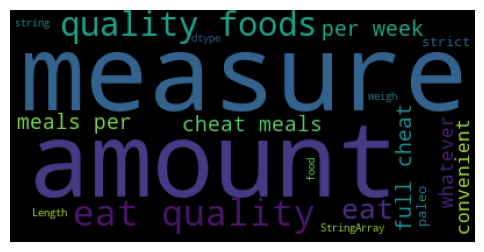

In [81]:
visualize_word('eat')

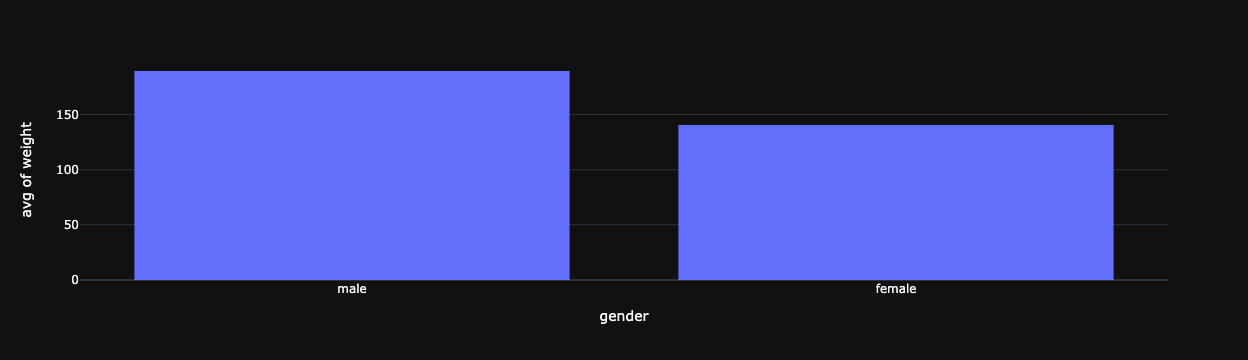

<Figure size 600x600 with 0 Axes>

In [82]:
# histogram average weight between athele male and female
import plotly.express as px

df1 = df[['weight','gender']]
fig = px.histogram(df1, x="gender",y="weight",  histfunc='avg')
plt.savefig('hist.png')
fig.show()

<a id="7"></a> <br>
# Relationship Between Variables

<a id="8"></a> <br>
## Pearson Correlation
* Strength of the relationship between two variables
* Lets look at correlation between all features.

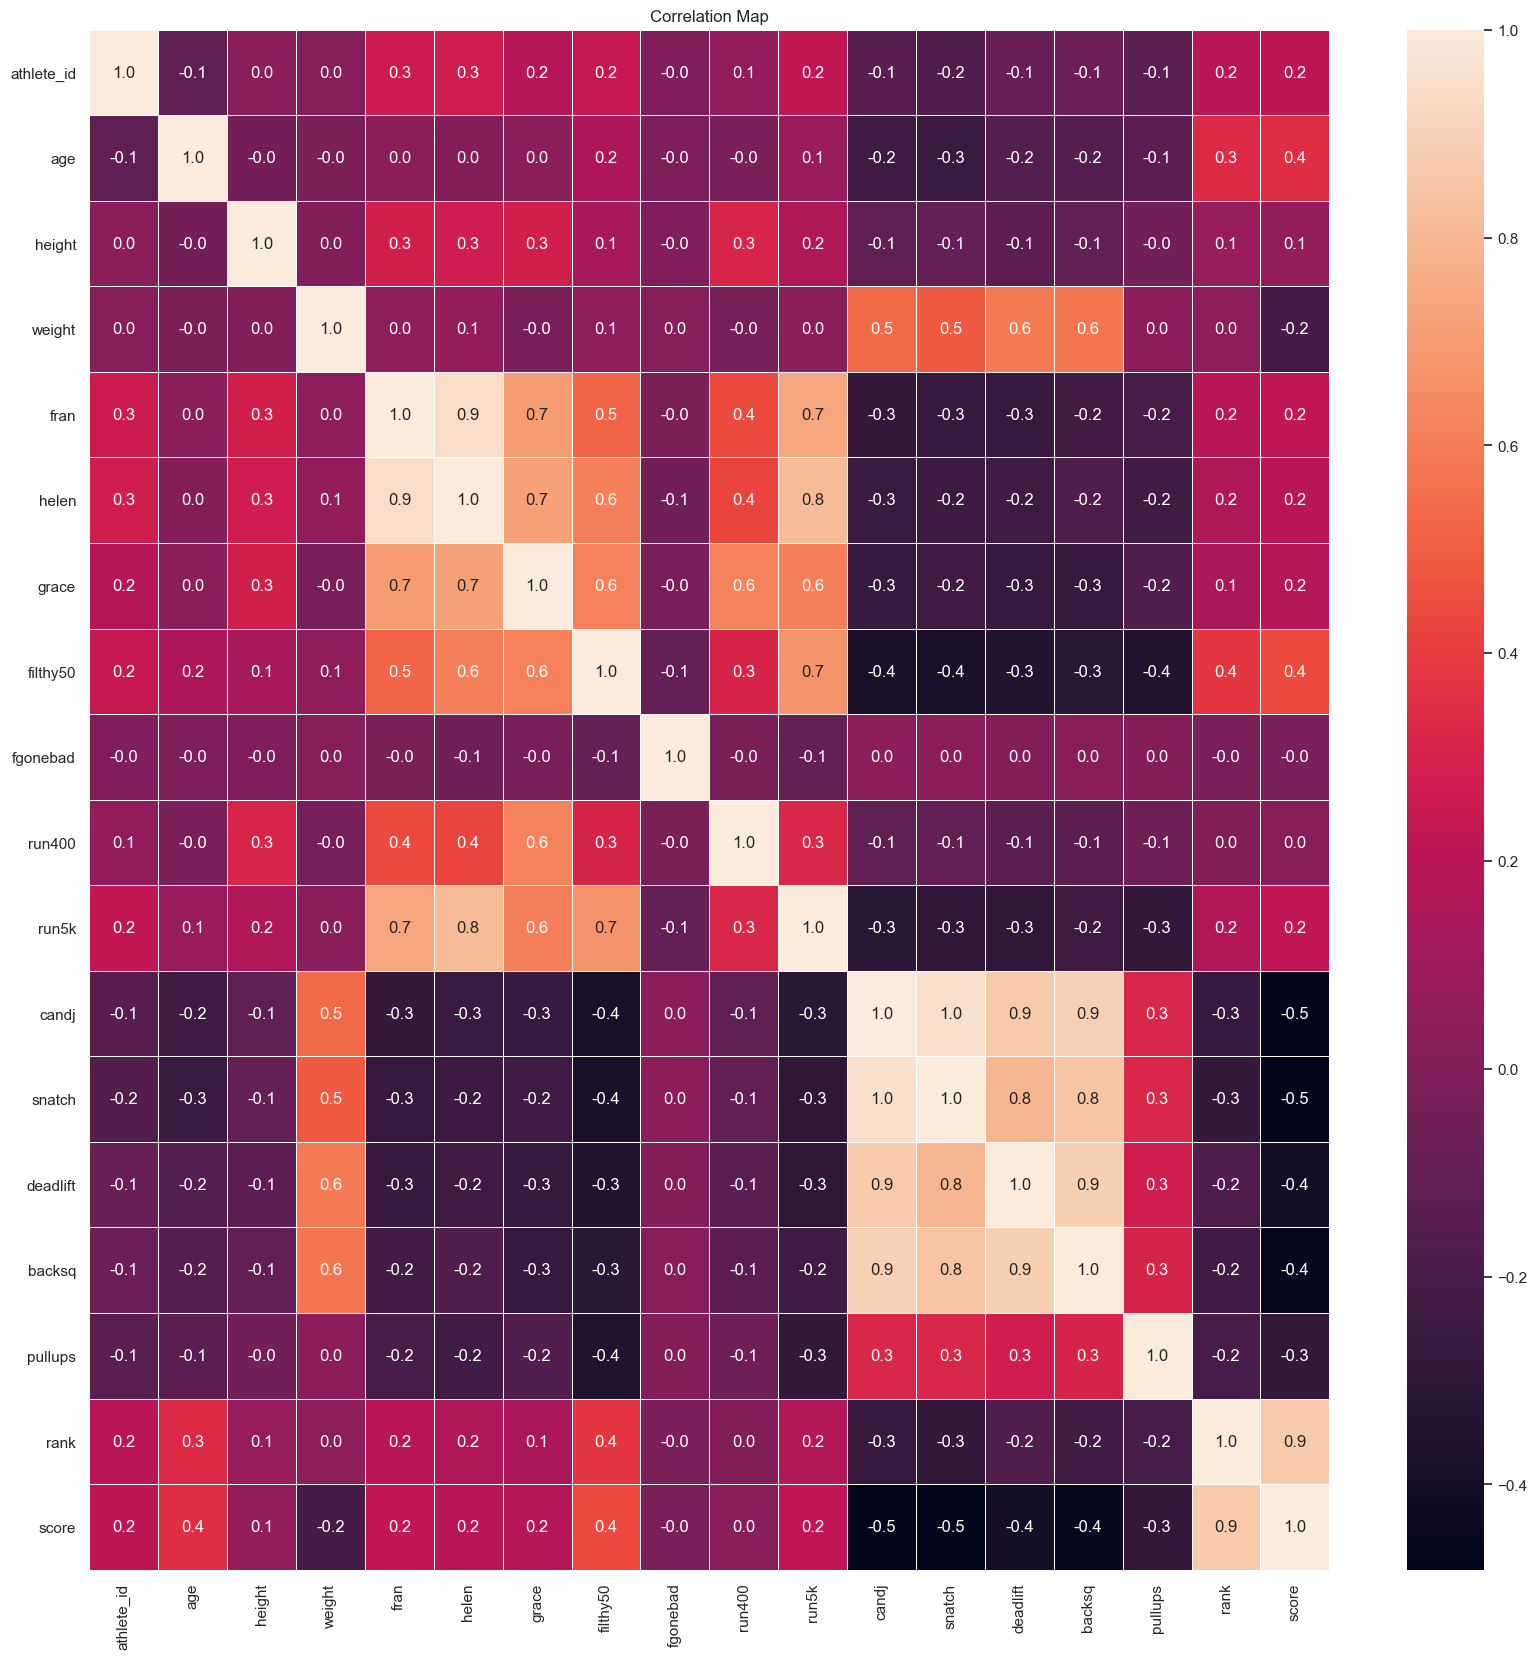

In [84]:
f,ax=plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('heatmap to indicates correlation between variables.png')
plt.show()

### ----------> OBSERVATION

+ There is a strong positive correlation between `helen` & `fran`, `helen` & `run5k`, `candj` & `backsq`, `backsq` & `deadlift`, `rank` & `score`, `backsq` & `snatch`.

+ There is **multicollinearity** (Mulitple independent variables are highly correlated) between attributes. If I want to feed these feature into my multiple regression model, I would need to drop 1 of the column that is strongly correlated with each other to prevent statistical insignificant problem

In [85]:
#  Groups & Target Summary Stats
df.groupby("gender").weight.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
gender,,,,,
female,178,140.0,140.533708,13.775090,188
male,813,188.0,189.418204,21.976079,298


<a id="1"></a> <br>
# Histogram
* How many times each value appears in dfset. This description is called the distribution of variable
* Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value.
* Frequency = number of times each value appears

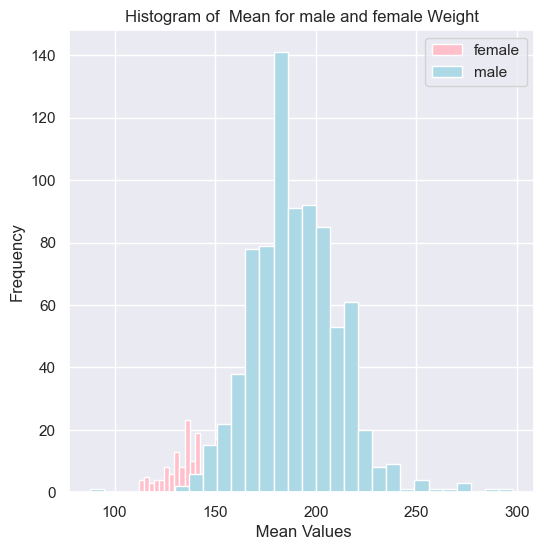

Most frequent female weight mean is:  134.8
Most frequent male weight mean is:  151.0


In [86]:
female = plt.hist(df[df["gender"] == "female"].weight,bins=30,label = "female", color="pink")
male = plt.hist(df[df["gender"] == "male"].weight,bins=30,label = "male", color="lightblue")
plt.legend()
plt.xlabel(" Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of  Mean for male and female Weight")
plt.savefig('female_male_weight_hist.png')
plt.show()

frequent_weight_mean = female[0].max()
index_frequent_weight_mean = list(female[0]).index(frequent_weight_mean)

most_frequent_female_weight_mean = female[1][index_frequent_weight_mean]
most_frequent_male_weight_mean = male[1][index_frequent_weight_mean]

print("Most frequent female weight mean is: ",most_frequent_female_weight_mean)
print("Most frequent male weight mean is: ",most_frequent_male_weight_mean)

### ----------> OBSERVATIONS:
 + We can see that the mean of the male weight is more to the right of the graph which indicates male weight is larger in general. The distribution of the 2 graphs are approximately normally distributed

# ---------
### Randomly select a 10 number of rows from a dataframe


In [87]:
df2 = df.sample(n=10, random_state=42)
df2.head(3)

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,division,rank,score
213,11444,dan juchniewicz,mid atlantic,crossfit rage,crossfit rage,male,26,69,165,268,473,224,1201,315,54,1160,255,216,407,345,0,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|,i played youth or high school level sports|i p...,i began crossfit by trying it alone (without a...,i do multiple workouts in a day 3+ times a wee...,male,14739,573
331,19144,alexander pogrebinsky,north east,crossfit southie,crossfit southie,male,31,70,189,354,625,209,1504,238,90,1500,235,185,455,315,37,i eat 1-3 full cheat meals per week|,i workout mostly at a crossfit affiliate|i rec...,i have no athletic background besides crossfit|,i began crossfit with a coach (e.g. at an affi...,i usually only do 1 workout a day|i typically ...,male,43445,766
501,144032,sheldon johnson,north west,crossfit intensify,crossfit intensify,male,45,72,205,231,212,229,1996,289,63,1459,195,145,325,275,19,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|i rec...,i played youth or high school level sports|,i began crossfit with a coach (e.g. at an affi...,decline to answer|,male,43445,766


In [88]:
# convert specified column in the dataframe into series
population_weight = df['weight'].squeeze()
print('Population mean=%.3f stdv=%.3f' % (mean(population_weight), std(population_weight)))
sample_weight = df2['weight'].squeeze()
print('Sample mean=%.3f stdv=%.3f' % (mean(sample_weight), std(sample_weight)))

Population mean=180.638 stdv=27.960
Sample mean=189.700 stdv=18.122


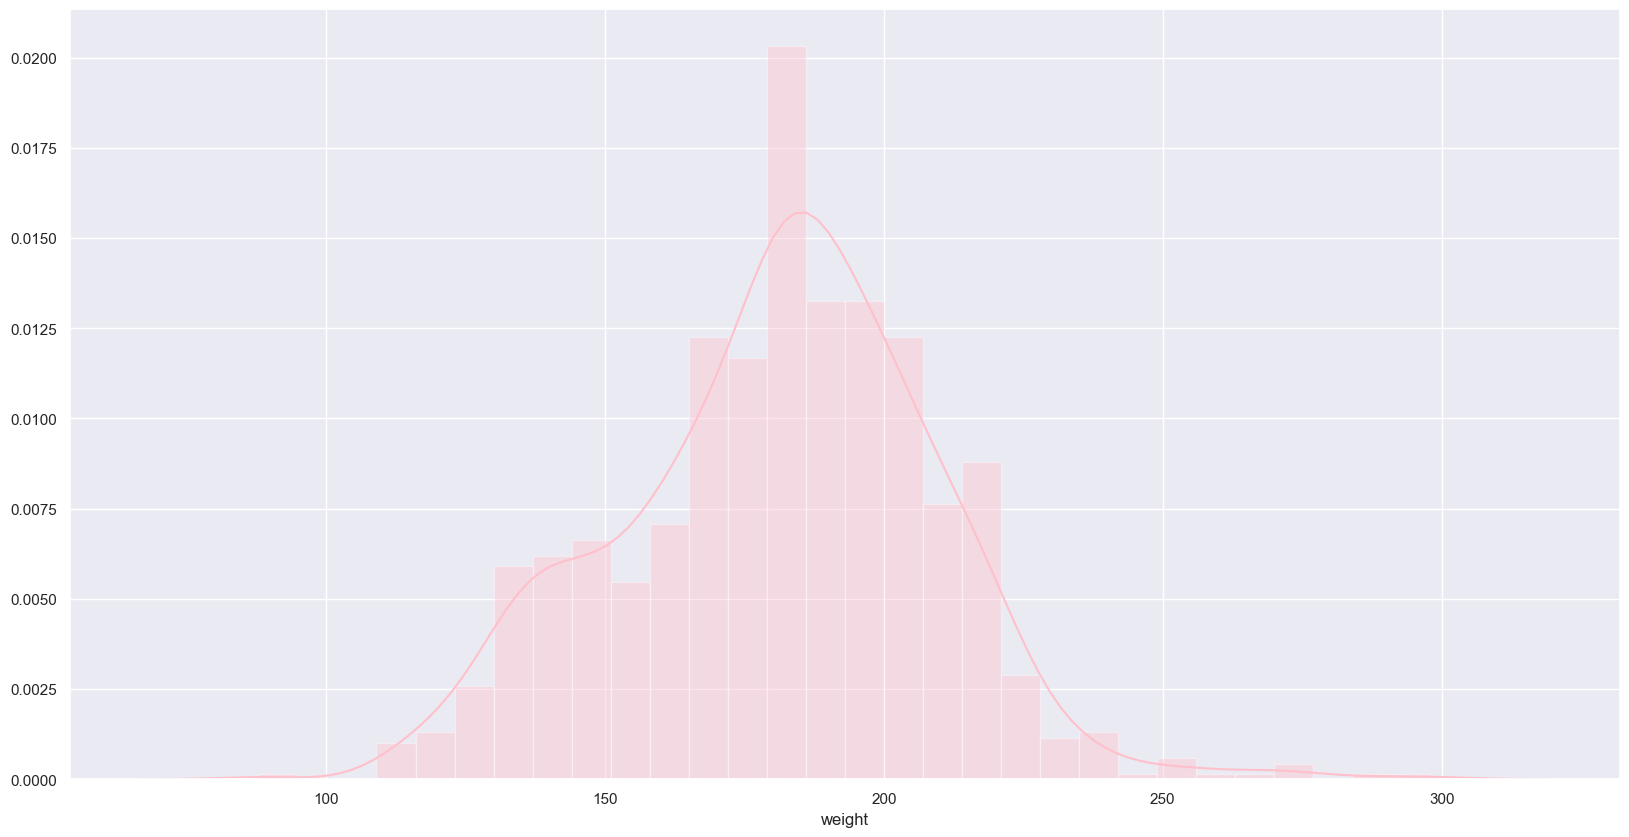

In [89]:
# Distribution of population weight
plt.figure(figsize = (20,10))
sns.distplot(population_weight,color = 'pink')
plt.savefig('pop_distplot.png')

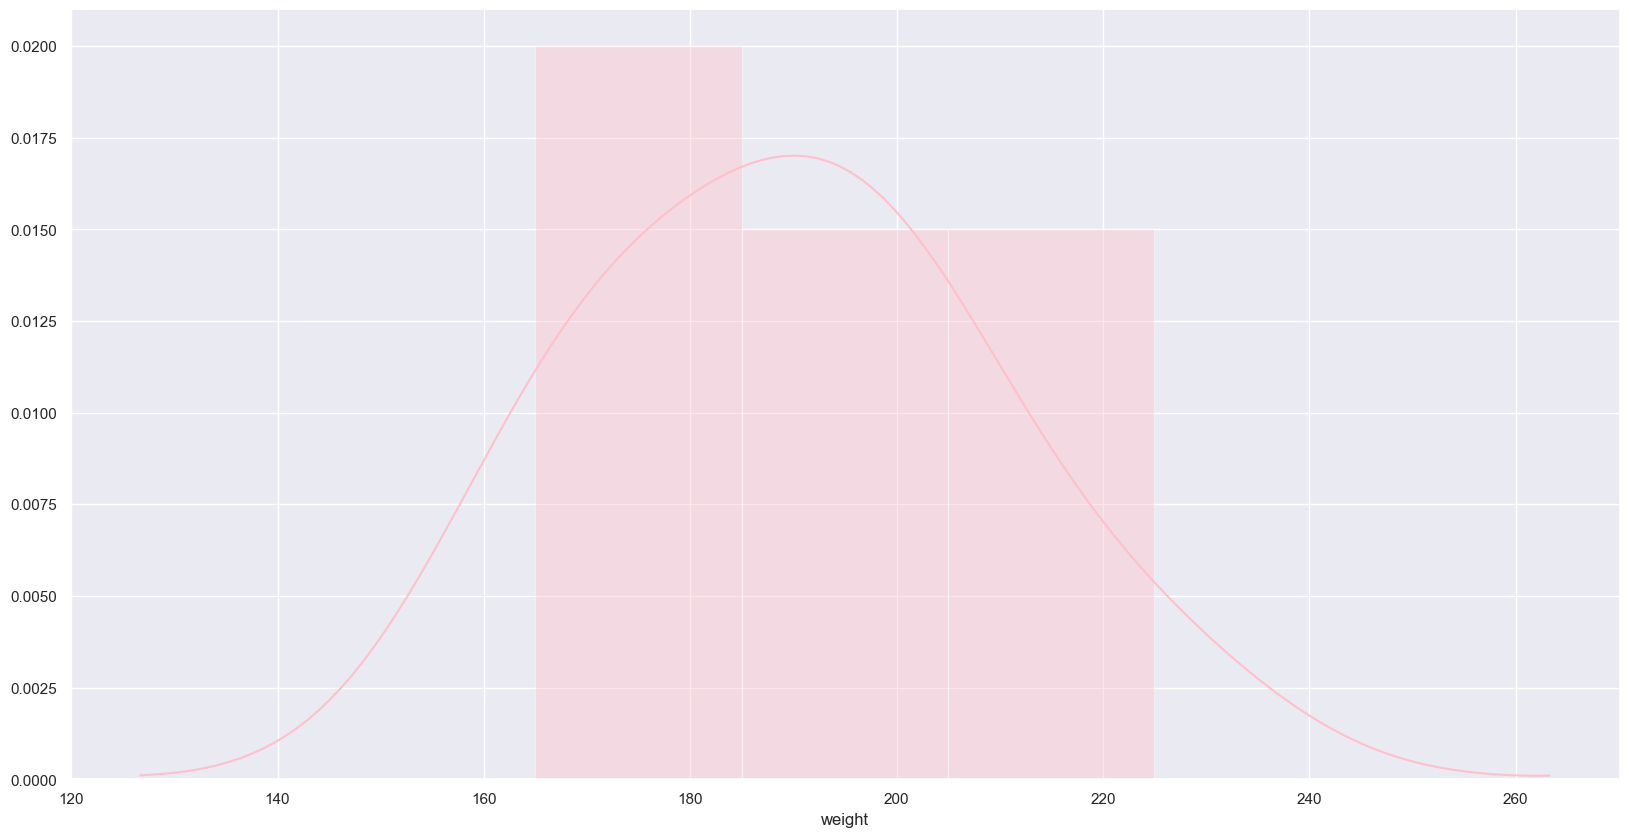

In [90]:
# Distribution of sample weight
plt.figure(figsize = (20,10))
sns.distplot(sample_weight,color = 'pink')
plt.savefig('sample_distplot.png')

### --------> OBSERVATIONS:

The distribution of the population weight and sample weight somewhat normally distributed

<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>2. Normality Test</strong></h1>

I need to decide whether to use parametric or nonparametric statistical methods.

### The Central Limit Theorem
If n>30, the Central Limit Theorem can be used.

Unlike the normal case, these histograms all differ in shape. In particular, they become progressively less skewed as the sample size n increases.

provide convincing evidence that a sample size of n=30 is sufficient to overcome the skewness of the population distribution and give an approximately normal X sampling distribution.

+ H₀: The data is normally distributed.
+ H₁: The data is not normally distributed.
+ H₀: The variances of the samples are the same. 
+ H₁: The variances of the samples are different.
At α=0.05. If the p-value is >0.05, it can be said that the mean weight is normally distributed.



 mu = 180.64 and sigma = 27.96



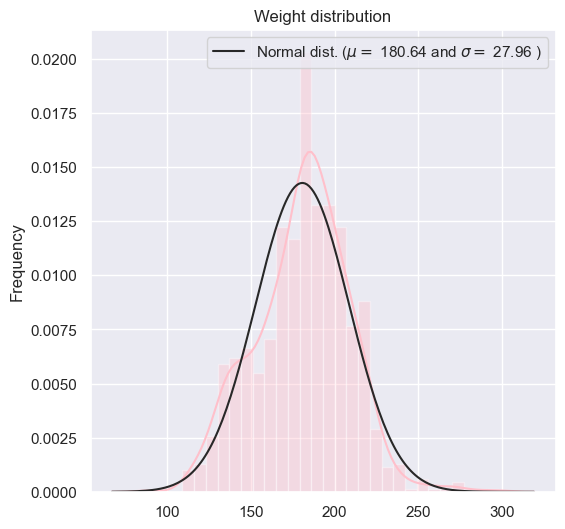

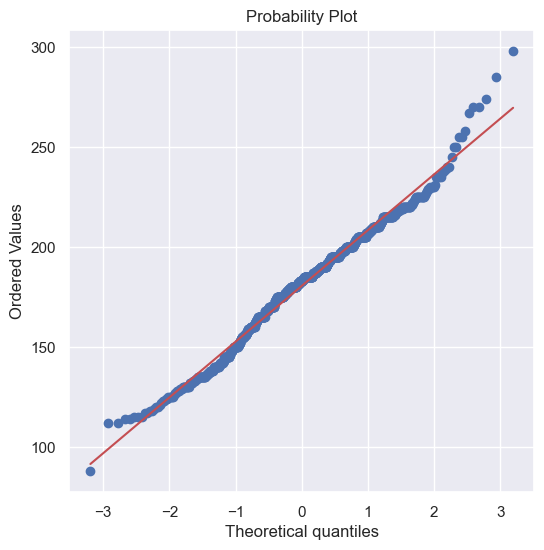

In [91]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics


weight = np.array(df['weight'], dtype=float)
sns.distplot(weight , fit=norm,color = 'pink');

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(weight)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Weight distribution')

# Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(weight, plot=plt)
plt.show()

# Shapiro-Wilk Test

In [92]:
def check_normality_ShapiroWilk(data, data_name):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.3f" % p_value_normality)
    stat, p = shapiro(df.weight)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha_value = 0.05
    print(f"The distribution for the {data_name} weight: ")
    if p_value_normality < alpha_value:
        print(f"The p value is less than alpha {alpha_value} which p is significant -> Reject null hypothesis: The data is NOT normally distributed")
    else:
        print(f"The p value is larger than alpha {alpha_value} which p is not significant -> Fail to reject null hypothesis: The data is normally distributed")
    print(f"\n\n")

In [93]:
check_normality_ShapiroWilk(population_weight, "population_weight")

check_normality_ShapiroWilk(sample_weight, "10 samples")

check_normality_ShapiroWilk(df[df["gender"] == "female"].weight, "female weight")

check_normality_ShapiroWilk(df[df["gender"] == "male"].weight, "male weight")

p value:0.000
Statistics=0.989, p=0.000
The distribution for the population_weight weight: 
The p value is less than alpha 0.05 which p is significant -> Reject null hypothesis: The data is NOT normally distributed



p value:0.732
Statistics=0.989, p=0.000
The distribution for the 10 samples weight: 
The p value is larger than alpha 0.05 which p is not significant -> Fail to reject null hypothesis: The data is normally distributed



p value:0.123
Statistics=0.989, p=0.000
The distribution for the female weight weight: 
The p value is larger than alpha 0.05 which p is not significant -> Fail to reject null hypothesis: The data is normally distributed



p value:0.000
Statistics=0.989, p=0.000
The distribution for the male weight weight: 
The p value is less than alpha 0.05 which p is significant -> Reject null hypothesis: The data is NOT normally distributed





### -------> OBSERVATIONS:


According to the Shapiro-Wilk Test using the p values, the overall population and male are not normally distributed; the female and 10 samples are normally distributed

### --------> OBSERVATIONS:

The distribution graphs (displot, Q-Q plot, histogram) show that the weight distribution is normally distributed

# Check homogeneity of variance using Levene’s test

In [94]:
def check_variance_homogeneity_Levene(group1, group2, group1_name, group2_name):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.3f" % p_value_var)
    alpha_value = 0.05
    print(f"Check homogeneity of variance using Levene’s test between {group1_name} and {group2_name}: ")
    if p_value_var <alpha_value:
        print(f"The p value is less than alpha {alpha_value} which p is significant -> Reject the null hypothesis. The variances of the samples are DIFFERENT because the groups have statistically significant difference in their variability.\n\n")
    else:
        print(f"The p value is larger than alpha {alpha_value} which p is not significant -> Fail to reject the null hypothesis. The variances of the samples are SAME because the groups have non-statistically significant difference in their variability.\n\n")

check_variance_homogeneity_Levene(population_weight, sample_weight, "population weight", "10 samples' weight")

p value:0.215
Check homogeneity of variance using Levene’s test between population weight and 10 samples' weight: 
The p value is larger than alpha 0.05 which p is not significant -> Fail to reject the null hypothesis. The variances of the samples are SAME because the groups have non-statistically significant difference in their variability.




## -------> OBSERVATION
he variances of the samples are SAME

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>3. Parametric Tests</strong></h1>

+ Ho: Athlete population mean weight is the same as athlete sample mean weight in the CrossFit Game 2015: μ₁=μ₂
+ Ha: The population and sample weights are different μ₁# μ₂


# T-Sample Test

In [95]:
ttest,p_value = stats.ttest_ind(np.array(population_weight).astype(int), np.array(sample_weight).astype(int))
print("p value:%.3f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.307
Fail to reject null hypothesis


# 1 Small Sample Hypothesis Test
A test on 10 athletes who competed in the crossfit, the weight of each athlete is inspected, using alpha = 0.05.

A one-sample t-test checks whether a sample mean differs from the population mean.


In [96]:
import scipy.stats as stats
import math

In [97]:
print( population_weight.mean() )
print( sample_weight.mean() )

180.6377396569122
189.7


In [98]:
# cast population_weight and sample_weight as numeric values
population_weight = population_weight.astype(float)
sample_weight = sample_weight.astype(float)

In [99]:
stats.ttest_1samp(a = sample_weight,               # Sample data
                 popmean = population_weight.mean())  # Pop mean

Ttest_1sampResult(statistic=1.5002015259335348, pvalue=0.16779941438154244)

# Find T Critical to the Rejection region

In [100]:
lower_tail_quantile_to_check = 0.025
upper_tail_quantile_to_check = 0.975
degree_of_freedom = 9

lower_tail = stats.t.ppf(q=lower_tail_quantile_to_check,  # Quantile to check
            df=degree_of_freedom)  # Degrees of freedom

upper_tail = stats.t.ppf(q=upper_tail_quantile_to_check,  # Quantile to check
                         df=degree_of_freedom)  # Degrees of freedom


print(f"The Lower Tail rejection region is: (-∞, {lower_tail}]"
      f"\nThe Upper Tail rejection region is: [{upper_tail}, +∞)"
      f"\nThe Two Tail rejection region is: (-∞, {lower_tail}] U [{upper_tail}, +∞)")

The Lower Tail rejection region is: (-∞, -2.262157162740992]
The Upper Tail rejection region is: [2.2621571627409915, +∞)
The Two Tail rejection region is: (-∞, -2.262157162740992] U [2.2621571627409915, +∞)


In this case, the p-value is higher than our significance level α (0.05), so we should reject the null hypothesis. If we were to construct a 95% confidence interval for the sample, it captures a population mean of 180.638

In [101]:
sigma = sample_weight.std()/math.sqrt(10)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 9,                     # Degrees of freedom
                 loc = sample_weight.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(176.0349978043897, 203.3650021956103)

On the other hand, it is not significant at the 80% confidence level. This means if we were to construct a 80% confidence interval, it even would not capture the population mean:

In [102]:
stats.t.interval(alpha = 0.8,                # Confidence level
                 df = 9,                     # Degrees of freedom
                 loc = sample_weight.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(181.34554476671252, 198.05445523328746)

# Calculate Z score for mean weight of different gender

In [103]:
# selecting rows based on condition
male_weight = df[df['gender'] == 'male']
female_weight = df[df['gender'] == 'female']
df.gender.unique()

<StringArray>
['male', 'female']
Length: 2, dtype: string

In [104]:
# Import statistics Library
import statistics

print("Population Male Mean: "+str(male_weight['weight'].mean()))
male_weight_sample = male_weight.sample(frac=0.10)
sample_mean_male = male_weight_sample['weight'].mean()
print("Sample Male Mean: "+str(sample_mean_male))
sample_std_male = statistics.stdev(male_weight_sample.weight)
print("Sample Male Standard Deviation: "+str(sample_std_male))

Population Male Mean: 189.41820418204182
Sample Male Mean: 186.49382716049382
Sample Male Standard Deviation: 20.322401432901575


In [105]:
print("Population female Mean: "+str(female_weight['weight'].mean()))
female_weight_sample = female_weight.sample(frac=0.10)
sample_mean_female = female_weight_sample['weight'].mean()
print("Sample female Mean: "+str(sample_mean_female))
sample_std_female = statistics.stdev(female_weight_sample.weight)
print("Sample female Standard Deviation: "+str(sample_std_female))

Population female Mean: 140.53370786516854
Sample female Mean: 140.88888888888889
Sample female Standard Deviation: 13.379088160259652


In [106]:
import math
# Confidence Level 95 %  for one sided Normal curve
zscore_critical = 1.65
# Calculate the test statistics
zscore_test_stat = ((sample_mean_male - sample_mean_female)
                    *math.sqrt(8916))/sample_std_female
print(zscore_test_stat)

321.8625047335677


### -------> OBSERVATIONS:

We find out how many standard deviations you are from the mean by looking at the z-value. we have a z-score of large positive number indicates that a greater raw score than the mean average.

In [107]:
# make the dataframe one-dimensional
male_weight = male_weight['weight']
female_weight = female_weight['weight']

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Single Variance</strong></h1>


In [108]:
# # generate two independent samples
# sample_male_data = male_weight.sample(25).to_numpy(dtype=int)
# sample_female_data = female_weight.sample(25).to_numpy(dtype=int)

# Confidence Invertal

In [109]:
# Find the Chi-Square Critical Value
import scipy.stats
# find Chi-Square critical value for 2 tail hypothesis tests
alpha = 0.05

# degree of freemdom
dof = len(df)-1

# X² for upper tail
print(f'The critical value X²U for the upper tail is {scipy.stats.chi2.ppf(1-alpha, df=dof)}') # 39.3641
# X² for lower tail
print(f'The critical value X²L for the lower tail is {scipy.stats.chi2.ppf(alpha, df=dof)}') # 12.4011

The critical value X²U for the upper tail is 1064.310634603235
The critical value X²L for the lower tail is 917.9631747331262


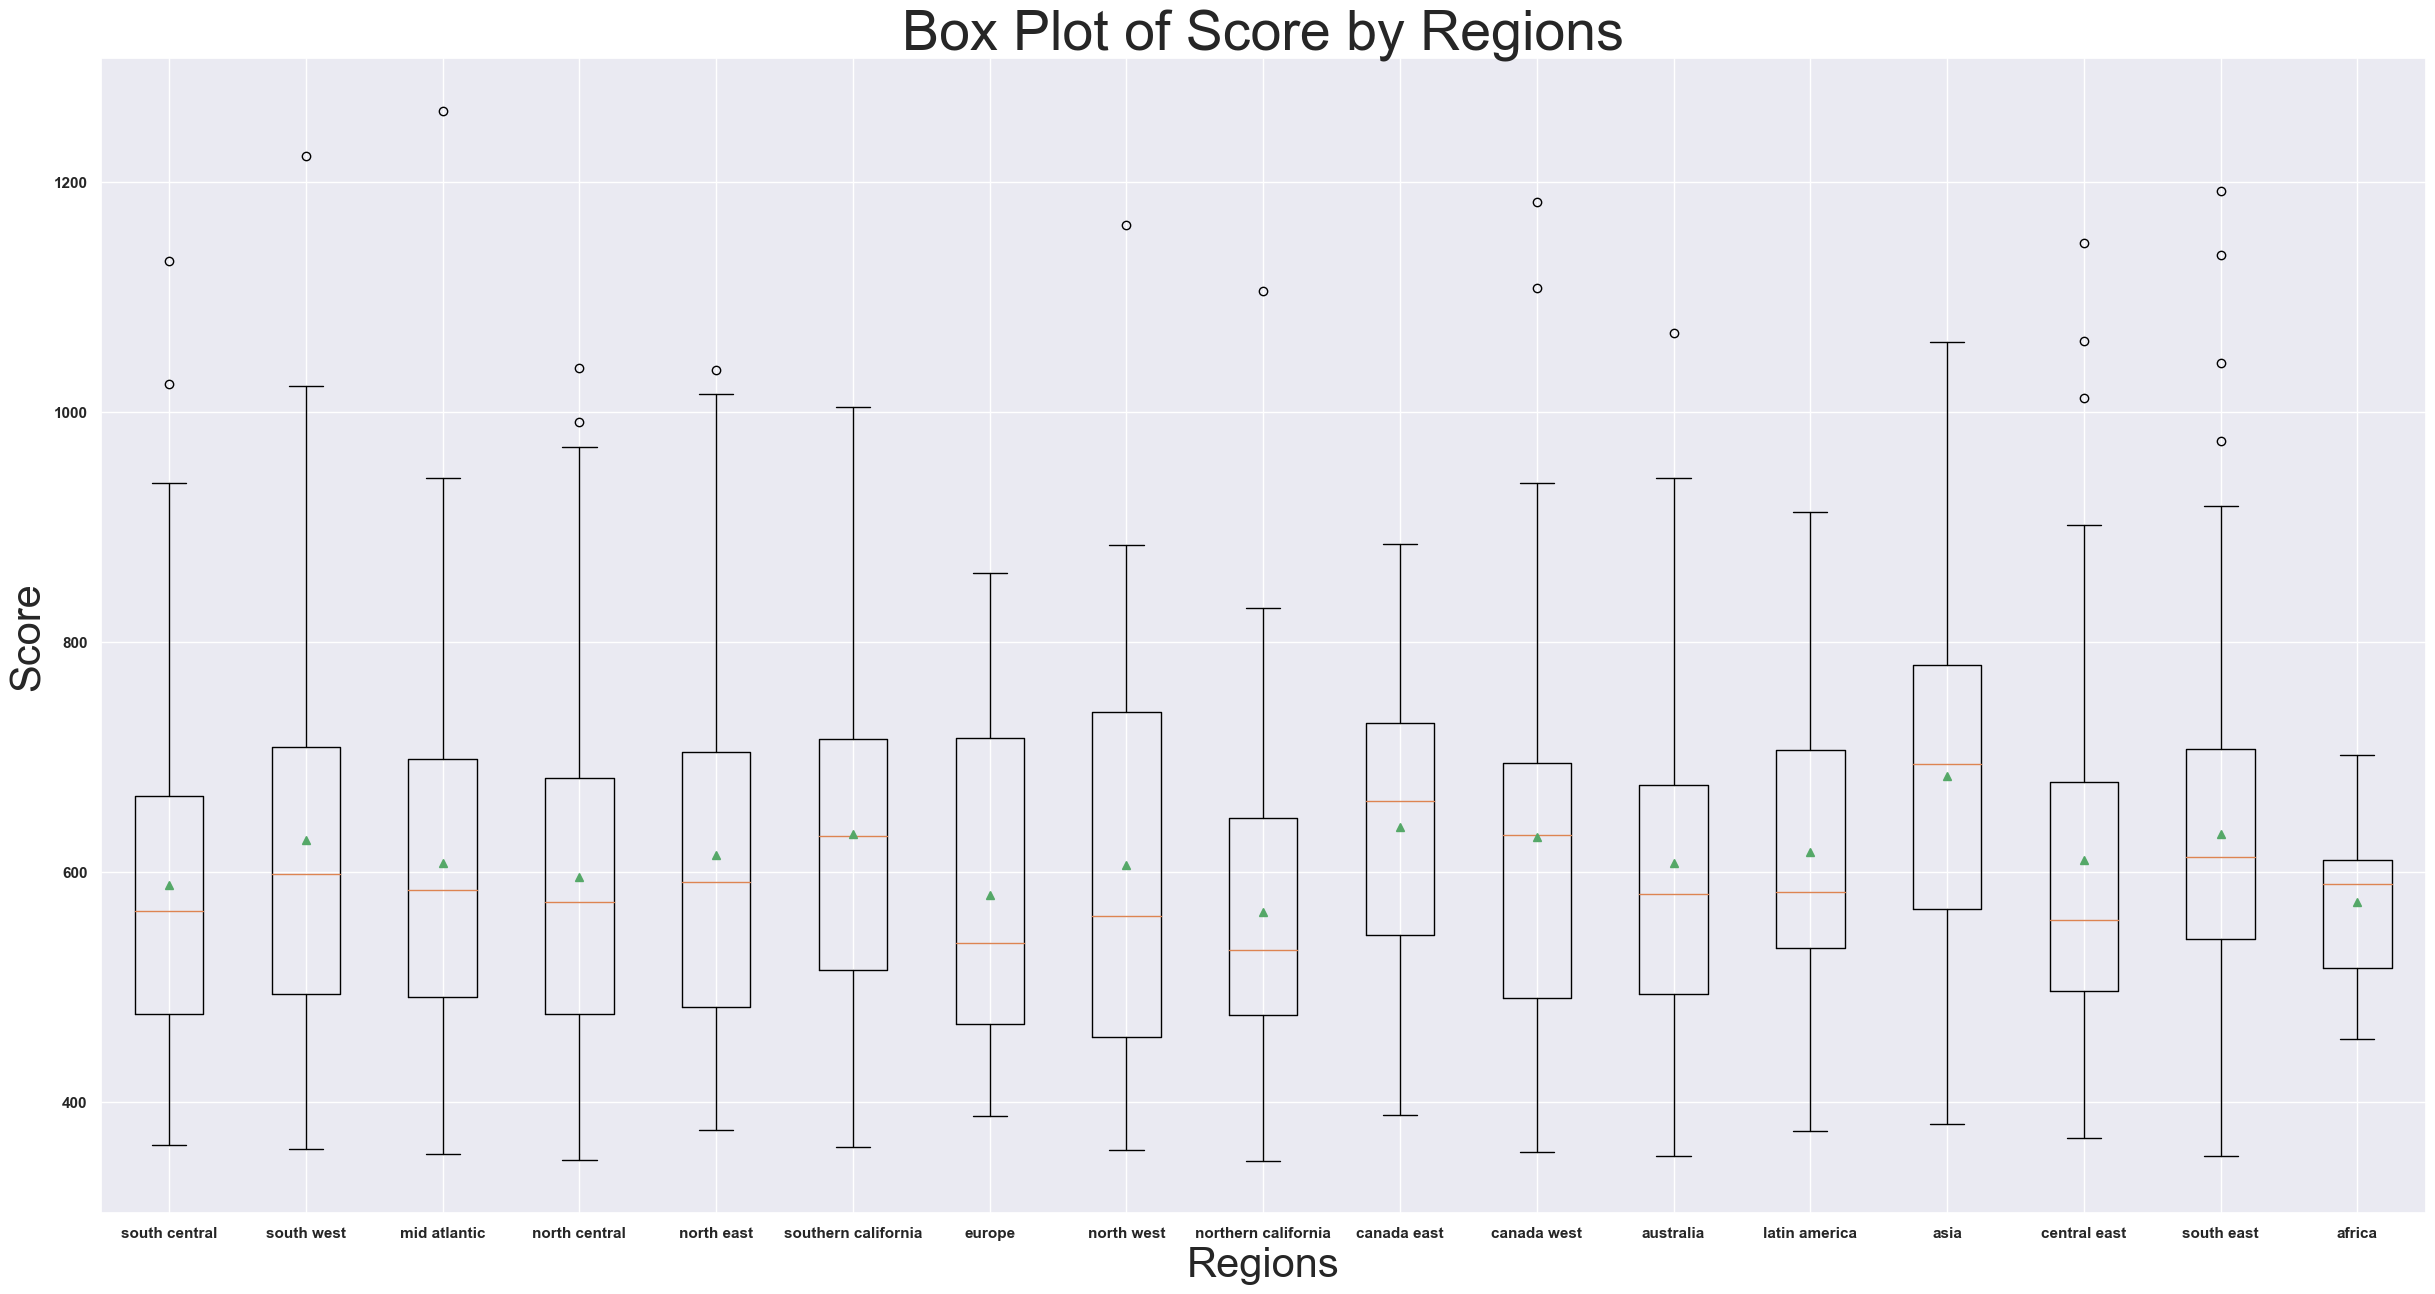

In [110]:
data = [*[df['score'][df['region'] == region] for region in df.region.unique()]]

fig = plt.figure(figsize= (30, 15))
ax = fig.add_subplot(111)
ax.set_title("Box Plot of Score by Regions", fontsize= 40)
ax.set

ax.boxplot(data,
           labels= [region for region in df.region.unique()],
           showmeans= True)

plt.xlabel("Regions", fontsize= 30)
plt.ylabel("Score", fontsize= 30)
# bolden the labels
plt.xticks(fontweight= 'bold')
plt.yticks(fontweight= 'bold')
plt.savefig('box_plot_score_by_regions.png')
plt.show()

### ------> OBSERVATIONS
The graphical testing of homogeneity of variances supports the statistical testing findings which is the groups have approximately equal variance.

By default box plots show the median (orange line in graph above). The green triangle is the mean for each group which was an additional argument that was passed into the method.

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>One way Analysis of Variance (ANOVA)</strong></h1>

## ANOVA Hypotheses
+ H0: μ1=μ2=…=μp
+ H1: All μ are not equal

### Parametric test assumptions
1. The k samples are random.
2. All of the k populations being sampled are normally distributed.
3. All of the populations are independent.
4. All of the k populations have the same variance σ2.

## ANOVA Assumptions
+ Residuals (experimental error) are approximately normally distributed (Shapiro-Wilks test or histogram)homoscedasticity or Homogeneity of variances (variances are equal between treatment groups) (Levene’s, Bartlett’s, or Brown-Forsythe test)
+ Observations are sampled independently from each other (no relation in observations between the groups and within the groups) i.e., each subject should have only one response
+ The dependent variable should be continuous. If the dependent variable is ordinal or rank (e.g. Likert item data), it is more likely to violate the assumptions of normality and homogeneity of variances. If these assumptions are violated, you should consider the non-parametric tests (e.g. Mann-Whitney U test, Kruskal-Wallis test).


## How ANOVA works?
+ Check sample sizes: equal number of observation in each group
+ Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degrees of freedom (df) for a group
+ Calculate Mean Square error (MSE) (SS error/df of residuals)
+ Calculate F value (MS of group/MSE)
+ Calculate p value based on F value and degrees of freedom (df)

## Questions?
+ Imbalance label problem (unequal sample size for each group) data

| **ANOVA Source** | **df** | **SS** |     **MS**      | **F**    | **Notes**           |
|:----------------:|:------:|:------:|:---------------:|:--------:|:-------------------:|
|  **Treatments**  |  k-1   | SSTr   | MSTr=SSTr/(k-1) | MSTr/MSE | k: number of groups |
|    **Errors**    |  n-k   | SSE    | MSE=SSE/(n-k)   |          | n: sample size      |
|    **Total**     |  n-1   | SST    |                 |          |                     |


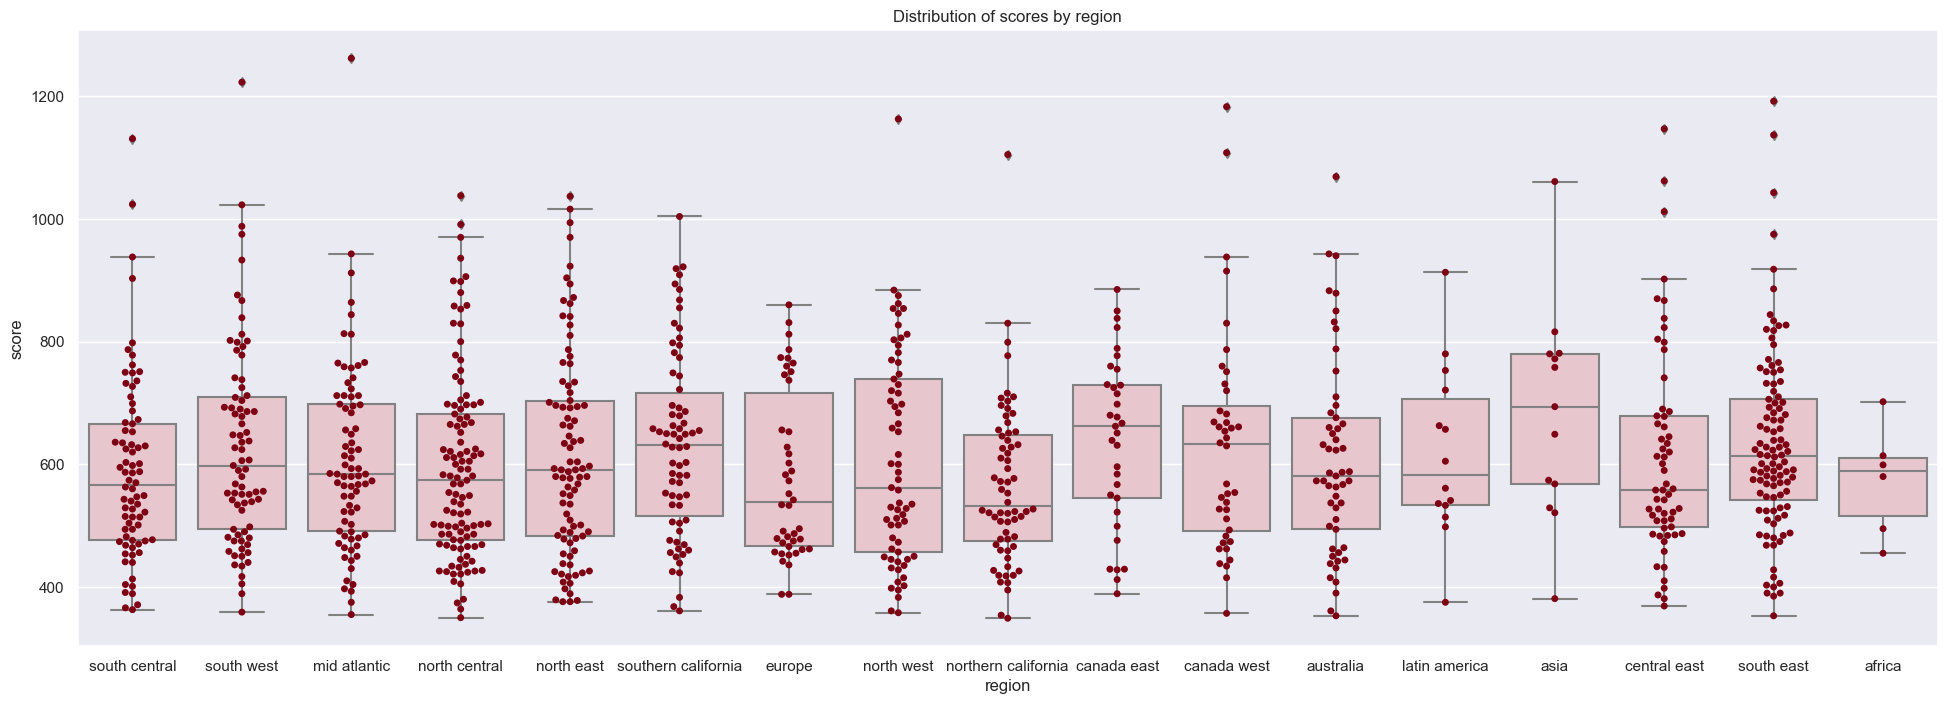

In [111]:
# generate a boxplot to see the data Distribution of scores by region. Using boxplot, we can
# easily detect the differences between different regions
import matplotlib.pyplot as plt
import seaborn as sns
# set with and height of the figure
plt.figure(figsize=(24,8))
ax = sns.boxplot(x='region', y='score', data=df, color='#EEC0CB')
ax = sns.swarmplot(x="region", y="score", data=df, color='#7d0013')

# set title with matplotlib
plt.title('Distribution of scores by region')
plt.savefig('boxplot_distribution_scores_by_regions.png')
plt.show()

In [45]:
rp.summary_cont(df['score'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,score,991.0,610.5499,156.3046,4.9652,600.8065,620.2934


In [46]:
df['score'] = np.array(df['score'],dtype='float64')

rp.summary_cont(df['score'].groupby(df['region']))

,N,Mean,SD,SE,95% Conf.,Interval
region,,,,,,
africa,6,574.1667,88.3706,36.0772,481.4274,666.9059
asia,13,683.3846,173.3679,48.0836,578.6195,788.1498
australia,53,608.0566,161.3581,22.1642,563.5808,652.5324
canada east,33,639.6061,139.1072,24.2155,590.2808,688.9313
canada west,40,630.7000,181.2259,28.6543,572.7411,688.6589
central east,59,610.2034,169.9198,22.1217,565.9220,654.4847
europe,42,580.4286,137.6875,21.2456,537.5221,623.3350
latin america,14,617.8571,139.5624,37.2996,537.2762,698.4381
mid atlantic,77,607.6753,151.0223,17.2106,573.3975,641.9532


In [47]:
print(f'NUMBER OF CATEGORIES: {df.region.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.region.unique()}\n\n\n')

NUMBER OF CATEGORIES: 17; 

UNIQUE NAMES OF THE CATEGORIES <StringArray>
[      'south central',          'south west',        'mid atlantic',
       'north central',          'north east', 'southern california',
              'europe',          'north west', 'northern california',
         'canada east',         'canada west',           'australia',
       'latin america',                'asia',        'central east',
          'south east',              'africa']
Length: 17, dtype: string





# F Critical Value

test 2 variances

`scipy.stats.f.ppf(q, dfn, dfd)`

where:

`q`: The significance level to use
`dfn`: The numerator degrees of freedom
`dfd`: The denominator degrees of freedom




Steps in the test:
1. First write down the null and alternate hypothesis.
    >> H0 : μ1 =μ2 =μ3 =···=μk
    >> H1 : at least one pair have different means.
2. Next calculate the test statistic F using the data and present it in a
table as above.
3. Find the Rejection region for the corresponding alternate hypothesis
and chosen α value, that is find Fα,k−1,n−k.
4. Reject or Don’t Reject If the test statistic F falls in the rejection region, reject H0 and conclude H1 is true, or else do not reject H0. You should also interpret the result in words.

In [112]:
# ONE-WAY ANOVA USING SCIPY.STATS

# calculate f_oneway by looping through unique regions
stats.f_oneway(*[df['score'][df['region'] == region] for region in df.region.unique()])

F_onewayResult(statistic=1.1889922399442483, pvalue=0.26993810389596873)

### ----------> OBSERVATION:
F statistic is higher than our alpha => we fail to reject the H0

In [115]:
import scipy.stats

data1 = df.weight.sample(25).to_numpy(dtype=int)
data2 = df.score.sample(25).to_numpy(dtype=int)

# number of values in all groups
n = len(data1) + len(data2)
# number of groups
k = 2

# significance level
q = 1-.05
# numerator degrees of freedom
dfn = k-1
# denominator degrees of freedom
dfd = n-k

# print out number of gorjp
print(f'Number of values in all {k} groups: n={n}')

#find F critical value
print(f'F critical value: {scipy.stats.f.ppf(q=q, dfn=dfn, dfd=dfd)}')

Number of values in all 2 groups: n=50
F critical value: 4.042652128566653


In [116]:
from scipy.stats import f_oneway

# Conduct the one-way ANOVA
f_oneway(data1, data2)

F_onewayResult(statistic=219.99375286886274, pvalue=1.49567284265338e-19)

### -------> OBSERVATION

The purpose of this study was to test for a difference in score between the regions. There is non statistically significant difference between the score and weight and their effects the scores, Fstatistic = 219.99375286886274, p-value=1.49567284265338e-19.

As the p value significant, we reject the null hypothesis and conclude that they do not have equal variances.


<h1 style="color:#ffc0cb;font-size:60px;font-family:Georgia;text-align:center;"><strong>4. Non-Parametric Tests</strong></h1>

+ Ho: Athlete population mean weight is the same as athlete sample mean weight in the CrossFit Game 2015: μ₁=μ₂
+ Ha: The population and sample weights are different μ₁# μ₂


<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Wilcoxon signed-rank test</strong></h1>

+ Single paired sample.
+ The test assumes that the distribution being sampled is continuous and symmetric about its mean.

In [37]:
# Wilcoxon signed-rank test
from scipy.stats import wilcoxon

# generate two paired samples
data1 = female_weight.head(25)
data2 = female_weight.tail(25)

# compare samples
stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution. Therefore, we fail to reject the H0)')
else:
    print('Different distribution. Therefore, we reject the H0)')

Statistics=83.000, p=0.032
Different distribution (reject H0)


<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Mann-Whitney U test <br>(Wilcoxon Rank-Sum)</strong></h1>

Test for the mean of 2 group from unknown distributions

+ 2 independent population
+ non-parametric

### Null Hypothesis
> + H0 : μX − μY = 0
> + Ha : μ X − μ Y # 0

In [58]:
# generate two independent samples
sample_male_data = male_weight.sample(25).to_numpy(dtype=int)
sample_female_data = female_weight.sample(25).to_numpy(dtype=int)

In [41]:
# Mann-Whitney U test
from scipy.stats import mannwhitneyu
# compare samples
stat, p = mannwhitneyu(sample_male_data, sample_female_data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution. Therefore, we fail to reject the H0)')
else:
    print('Different distribution. Therefore, we reject the H0)')

Statistics=612.000, p=0.000
Different distribution (reject H0)


### ----> OBSERVATION:

Since the p value is less than the α = 0.05 we reject H0 and conclude that the weight between male and female are not the same.

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Kruskal Wallis test</strong></h1>


Assumptions for the test:
1. At least one of the two large sample conditions are met.
2. All the samples are random samples.
3. All the populations being sampled have the same shaped probability density function, with possibly different means.
4. The populations are independent.

Hypothesis Testing
H0 : μ1 =μ2 =μ3 =···=μk
H1 : at least two μi differ.

**NOTE**: The larger the differences the larger the test statistic H. This is why the test is only an upper tail test.

In [52]:
# Find the Chi-Square Critical Value
import scipy.stats
# find Chi-Square critical value for 2 tail hypothesis tests
alpha = float(0.01)
k = 4
degree_freedom = k-1
print(f'degrees of freedom: {(k-1)}')
# X² for upper tail
print(f'The critical value X²U for the upper tail is {scipy.stats.chi2.ppf(1-alpha, df=degree_freedom)}')

degrees of freedom: 3
The critical value X²U for the upper tail is 11.344866730144373


In [53]:
# Conduct the Kruskal-Wallis Test
result = stats.kruskal(*[df['score'][df['region'] == region] for region in df.region.unique()])

# Print the result
print(result)

KruskalResult(statistic=21.644331786306708, pvalue=0.15505130496906336)


### OBSERVATIONS

The critical value X²U for the upper tail rejection region is 11.344866730144373
, using 3 degrees of freedom, so the rejection region is [ 11.34, ∞). Since the test statistic = 21.644331786306708 which is much larger than 11.34 falls in the rejection region, we reject the null hypothesis. There is evidence to indicate that the three means are not all the same.


<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Chi Square Goodness of Fit test</strong></h1>

The Chi-Square Goodness of fit test is a non-parametric statistical hypothesis test that’s used to determine how considerably the observed value of an event differs from the expected value. it helps us check whether a variable comes from a certain distribution or if a sample represents a population. The observed probability distribution is compared with the expected probability distribution.


if chi_square_ value > critical value, the null hypothesis is rejected. if chi_square_ value <= critical value, the null hypothesis is accepted.


H0: (null hypothesis) A variable follows a hypothesized distribution.
H1: (alternative hypothesis) A variable does not follow a hypothesized distribution.

`chisquare(f_obs, f_exp)`

where:

`f_obs`: An array of observed counts.
`f_exp`: An array of expected counts. By default, each category is assumed to be equally likely.

Note that the p-value corresponds to a Chi-Square value with n-1 degrees of freedom (dof), where n is the number of different categories. In this case, dof = 5-1 = 4. You can use the Chi-Square to P Value Calculator to confirm that the p-value that corresponds to X2 = 4.36 with dof = 4 is 0.35947.

Since the p-value (.35947) is not less than 0.05, we fail to reject the null hypothesis. This means we do not have sufficient evidence to say that the true distribution of customers is different from the distribution that the shop owner claimed.

In [71]:
# importing packages
import scipy.stats as stats
import numpy as np
n = 168
p1=0.35
p2=0.35
p3=0.2
p4=0.1

observed = [27,31,25,17]
# expected = [p1*n, p2*n, p3*n, p4*n]
expected = [15,21,25,39]

degree_freedom = int(len(observed) - 1)
alpha = float(0.01)

# Chi-Square Goodness of Fit Test
chi_square_test_statistic, p_value = stats.chisquare(
    observed, expected)

print(f'Degree of freedom is: {degree_freedom}')
# chi square test statistic and p value
print('chi_square_test_statistic is : ' +
      str(chi_square_test_statistic))
print('p_value : ' + str(p_value))

# find Chi-Square critical value
print(stats.chi2.ppf(1-alpha, df=degree_freedom))

Degree of freedom is: 3
chi_square_test_statistic is : 26.77216117216117
p_value : 6.571708865255795e-06
11.344866730144373


<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Chi Square Test for Independence</strong></h1>


### X² test of independence assumptions
+ The two samples are independent
+ No expected cell count is = 0
+ No more than 20% of the cells have and expected cell count < 5

<!-- ![](../media/images/tests_for_Independence.png) -->

The null and alternate hypothesis in this problem are,
H0 : The two factors are independent.
H1 : the two factors are dependent.

In [62]:
# Find the Chi-Square Critical Value
import scipy.stats

# find Chi-Square critical value for 2 tail hypothesis tests
alpha = float(0.05)
rows = 991
cols = 2
degree_freedom = (rows - 1) * (cols - 1)
print(f'degrees of freedom: {(rows - 1) * (cols - 1)}')
# X² for upper tail
print(f'The critical value X²U for the upper tail is {scipy.stats.chi2.ppf(1-alpha, df=degree_freedom)}')

degrees of freedom: 990
The critical value X²U for the upper tail is 1064.310634603235


In [63]:
df[["region", "gender"]]

,region,gender
0,south central,male
1,south west,male
2,mid atlantic,male
3,mid atlantic,male
4,north central,male
...,...,...
986,mid atlantic,female
987,north central,female
988,canada east,female
989,australia,female


In [64]:
rp.summary_cat(df[["region", "gender"]])

,Variable,Outcome,Count,Percent
0,region,north central,109,11.0
1,,south east,104,10.49
2,,north east,89,8.98
3,,south west,77,7.77
4,,mid atlantic,77,7.77
5,,south central,76,7.67
6,,southern california,70,7.06
7,,north west,65,6.56
8,,northern california,64,6.46
9,,central east,59,5.95


The table was called a contingency table, by Karl Pearson, because the intent is to help determine whether one variable is contingent upon or depends upon the other variable.

In [65]:
import scipy.stats as stats

crosstab = pd.crosstab(df["region"], df["gender"])
stats.chi2_contingency(crosstab)

(25.094823394131172,
 0.0681711614359482,
 16,
 array([[ 1.07769929,  4.92230071],
        [ 2.33501514, 10.66498486],
        [ 9.51967709, 43.48032291],
        [ 5.92734612, 27.07265388],
        [ 7.18466196, 32.81533804],
        [10.59737639, 48.40262361],
        [ 7.54389506, 34.45610494],
        [ 2.51463169, 11.48536831],
        [13.83047427, 63.16952573],
        [19.57820383, 89.42179617],
        [15.98587286, 73.01412714],
        [11.67507568, 53.32492432],
        [11.49545913, 52.50454087],
        [13.65085772, 62.34914228],
        [18.68012109, 85.31987891],
        [13.83047427, 63.16952573],
        [12.57315843, 57.42684157]]))

In [66]:
crosstab, test_results, expected = rp.crosstab(df["region"], df["gender"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

gender               
gender              female male    All   
region                                   
africa                0.10   0.50    0.61
asia                  0.20   1.11    1.31
australia             0.61   4.74    5.35
canada east           0.81   2.52    3.33
canada west           1.21   2.83    4.04
central east          1.11   4.84    5.95
europe                0.00   4.24    4.24
latin america         0.00   1.41    1.41
mid atlantic          1.51   6.26    7.77
north central         2.32   8.68   11.00
north east            1.41   7.57    8.98
north west            1.11   5.45    6.56
northern california   1.11   5.35    6.46
south central         1.01   6.66    7.67
south east            1.92   8.58   10.49
south west            2.02   5.75    7.77
southern california   1.51   5.55    7.06
All                  17.96  82.04  100.00

In [67]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 16.0) =,25.0948
1,p-value =,0.0682
2,Cramer's V =,0.1591


### ASSUMPTION CHECK

Checking the assumptions for the χ2 test of independence is easy. Let's recall what they are:

+ The two samples are independent
+ The variables were collected independently of each other, i.e. the answer from one variable was not dependent on the answer of the other
+ No expected cell count is = 0
+ No more than 20% of the cells have and expected cell count < 5
The last two assumptions can be checked by looking at the expected frequency table.

In [68]:
expected

gender           
gender                  female     male  
region                                   
africa                1.077699   4.922301
asia                  2.335015  10.664985
australia             9.519677  43.480323
canada east           5.927346  27.072654
canada west           7.184662  32.815338
central east         10.597376  48.402624
europe                7.543895  34.456105
latin america         2.514632  11.485368
mid atlantic         13.830474  63.169526
north central        19.578204  89.421796
north east           15.985873  73.014127
north west           11.675076  53.324924
northern california  11.495459  52.504541
south central        13.650858  62.349142
south east           18.680121  85.319879
south west           13.830474  63.169526
southern california  12.573158  57.426842

# Summary

Pairs of categorical variables can be summarized using a contingency table.
The chi-squared test can compare an observed contingency table to an expected table and determine if the categorical variables are independent.
How to calculate and interpret the chi-squared test for categorical variables in Python.


<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Summary</strong></h1>

# References

+ Machine Learning Mastery. 2022. A Gentle Introduction to Normality Tests in Python. [online] Available at: <https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/> [Accessed 22 August 2022].

+ Docs.scipy.org. 2022. Statistical functions (scipy.stats) — SciPy v1.9.0 Manual. [online] Available at: <https://docs.scipy.org/doc/scipy/reference/stats.html> [Accessed 26 August 2022].

+ [Cast Series to Numpy int datatype](https://pandas.pydata.org/pandas-docs/version/0.24.0rc1/api/generated/pandas.Series.to_numpy.html)